## TP2 : Classification using Linear & Quadratic Discriminant Analysis

First think of configuring your notebook :

In [2]:
import csv
# import os
from pylab import *
import numpy as np
from numpy import linalg as la
import pandas as pd
import matplotlib.pyplot as plt

## Reading synthetic data
Load the training and test data sets |synth_train.txt| and
|synth_test.txt| already used for Knn. Targets belong to {1,2} and entries belong to R^2.
We have 100 training data samples and 200 test samples.

* the 1st column contains the label of the class the sample, 
* columns 2 & 3 contain the coordinates of each sample in 2D.

In [3]:
train = np.loadtxt('synth_train.txt')
test = np.loadtxt('synth_test.txt')

## Recall about the main steps of discriminant analysis:
* estimation of weights `pi_1` and `pi_2` for each class,
* estimation of empirical means `mu_1` and `mu_2` for each class, 
* estimation of empirical covariance matrices  `sigma_1` and `sigma_2`,
* computation of the common averaged covariance `sigma` (average of intra-class covariances),
* computation of log-probabilities of belonging to each class,
* decision of classification,
* display results.


## TO DO : linear & quadratic discriminant analysis (LDA & QDA)
1. Implement a classifier using LDA of the data set. 
2. Then implement QDA classification.
3. In each case (LDA & QDA) show the decision boundary and
compute the error rate respectively for the training set and the test set. 
4. Compare and comment on your results with LDA and QDA.
5. You may also compare your results to K nearest neighbours.

_Indication 1 : matrices `sigma` are of size 2x2.
More generally, be careful of the sizes of vectors and matrices you
manipulate._

_Indication 2 : to display the regions of decision, you may use:_


### 0. Importation of dataset

In [4]:
# Training Set
X_train = train[:, 1:]
y_train = train[:,0]

# Testing Set
X_test = test[:, 1:]
y_test = test[:,0]

In [5]:
# Definition of dimensions and classes
N, D = X_train.shape
C = np.unique(y_train)
K = C.shape[0]

### 1./2. Implementation of LDA and QDA classifiers

In [6]:
# Computation of parameters
Pi, Sigma, sigma, mu = np.zeros((K)), np.zeros((K, D, D)), np.zeros((D, D)), np.zeros((K, D))
for k in range(K):
    X_train_k = X_train[y_train == C[k]]
    N_k = X_train_k.shape[0]
    Pi[k] = N_k / N
    mu[k] = np.mean(X_train_k, axis=0)
    S_k = (X_train_k - mu[k]).T @ (X_train_k - mu[k])
    Sigma[k] = S_k / N_k
    sigma += S_k / N

In [7]:
def f(x, method):
    return np.argmax([y_k(x, k, method) for k in range(K)])

def y_k(x, k, method):
    x = x.reshape(2, 1)
    mu_k = mu[k].reshape(2, 1)
    if method == "LDA":
        value = x.T @ la.inv(sigma) @ mu_k + np.log(Pi[k]) -  mu_k.T @ la.inv(sigma) @  mu_k / 2
    if method == "QDA":    
        value = - (x - mu_k).T @ la.inv(Sigma[k]) @ (x - mu_k) / 2 + np.log(Pi[k]) - np.log(la.det(Sigma[k]))
    return value[0, 0]

### 3. Representation of decision boundaries and computation of error rates

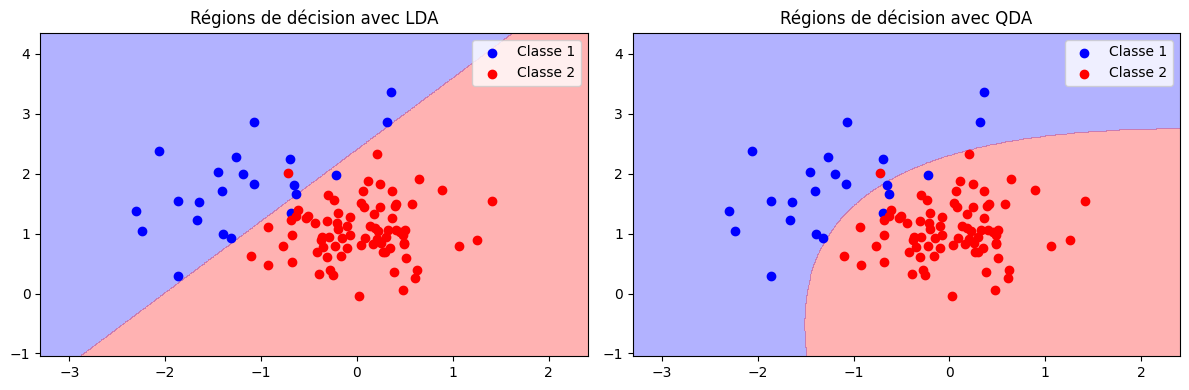

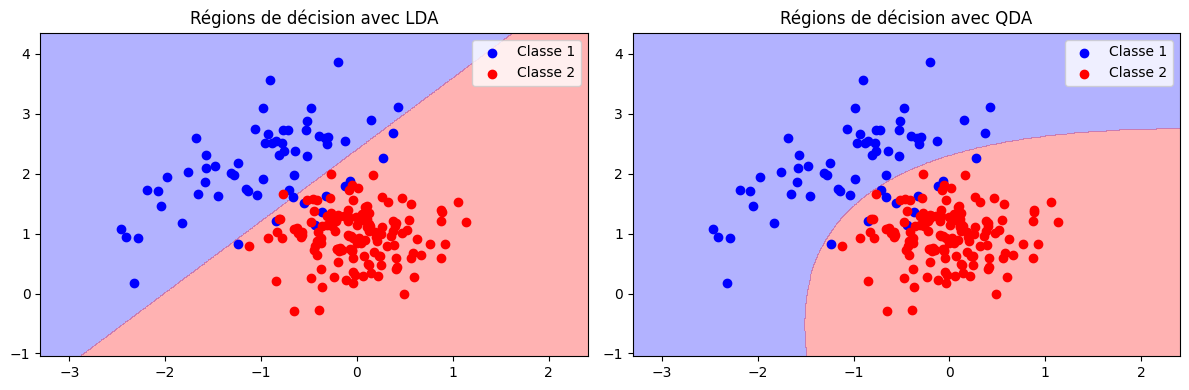

In [11]:
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

def plot_decision_regions(ax, method, title, type):
    Z = np.array([f(np.array([x, y]), method) for x, y in np.c_[xx.ravel(), yy.ravel()]])
    Z = Z.reshape(xx.shape)
    colors = ['blue', 'red', 'white']
    ax.contourf(xx, yy, Z, alpha=0.3, levels=[-1, 0, 1], colors=colors)

    if type == "train":
        for k in range(K):
            ax.scatter(X_train[y_train == C[k]][:, 0], X_train[y_train == C[k]][:, 1], label=f'Classe {int(C[k])}', color=colors[k])
    if type == "test":
        for k in range(K):
            ax.scatter(X_test[y_test == C[k]][:, 0], X_test[y_test == C[k]][:, 1], label=f'Classe {int(C[k])}', color=colors[k])

    ax.set_title(title)
    ax.legend()

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
plot_decision_regions(axs[0], "LDA", "Régions de décision avec LDA", "train")
plot_decision_regions(axs[1], "QDA", "Régions de décision avec QDA", "train")
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
plot_decision_regions(axs[0], "LDA", "Régions de décision avec LDA", "test")
plot_decision_regions(axs[1], "QDA", "Régions de décision avec QDA", "test")
plt.tight_layout()
plt.show()

**Commentaires:** ...

### 4. Comparaison and comments for LDA and QDA

In [9]:
def predict_labels(X, method):
    return np.array([C[f(x, method)] for x in X])

def error_rate(predictions, true_labels):
    incorrect_predictions = np.sum(predictions != true_labels)
    total_samples = len(true_labels)
    return incorrect_predictions / total_samples

In [10]:
# Predict labels for training set and test set
train_predictions_lda = predict_labels(X_train, "LDA")
test_predictions_lda = predict_labels(X_test, "LDA")
train_predictions_qda = predict_labels(X_train, "QDA")
test_predictions_qda = predict_labels(X_test, "QDA")

# Compute error rates
error_rate_train_lda = error_rate(train_predictions_lda, y_train)
error_rate_test_lda = error_rate(test_predictions_lda, y_test)
error_rate_train_qda = error_rate(train_predictions_qda, y_train)
error_rate_test_qda = error_rate(test_predictions_qda, y_test)

# Print the error rates
print(f"Error rate for LDA on the training set: {error_rate_train_lda:.2%}")
print(f"Error rate for LDA on the test set: {error_rate_test_lda:.2%}")
print(f"Error rate for QDA on the training set: {error_rate_train_qda:.2%}")
print(f"Error rate for QDA on the test set: {error_rate_test_qda:.2%}")

Error rate for LDA on the training set: 3.00%
Error rate for LDA on the test set: 5.50%
Error rate for QDA on the training set: 5.00%
Error rate for QDA on the test set: 5.50%


**Commentaires:** ...

### 5. Comparaison and comments for K-NN

In [10]:
from sklearn.neighbors import KNeighborsClassifier

# Predict labels for training set and test set
knn = KNeighborsClassifier(n_neighbors=2) 
knn.fit(X_train, y_train)
train_predictions_knn = knn.predict(X_train)
test_predictions_knn = knn.predict(X_test)

# Compute error rates
error_rate_train_knn = error_rate(train_predictions_knn, y_train)
error_rate_test_knn = error_rate(test_predictions_knn, y_test)

# Print the error rates
print(f"Error rate for Scikit-k-NN on the training set: {error_rate_train_knn:.2%}")
print(f"Error rate for Scikit-k-NN on the test set: {error_rate_test_knn:.2%}")

Error rate for Scikit-k-NN on the training set: 3.00%
Error rate for Scikit-k-NN on the test set: 6.00%


**Commentaires:** ...

## TO DO : LDA & QDA using scikit-learn module

The module `scikit-learn` is dedicated to machine learning algorithms. Many of them are available in a simple manner. For LDA and QDA, have a look at the tutorial available at http://scikit-learn.org/stable/modules/lda_qda.html 

**Warning** : you may have a critical view of the way LDA and QDA are illustrated in the proposed example...




In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# Predict labels for training set and test set
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)
train_predictions_lda_sklearn = lda_model.predict(X_train)
test_predictions_lda_sklearn = lda_model.predict(X_test)
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)
train_predictions_qda_sklearn = qda_model.predict(X_train)
test_predictions_qda_sklearn = qda_model.predict(X_test)

# Compute error rates
error_rate_train_lda_sklearn = error_rate(train_predictions_lda_sklearn, y_train)
error_rate_test_lda_sklearn = error_rate(test_predictions_lda_sklearn, y_test)
error_rate_train_qda_sklearn = error_rate(train_predictions_qda_sklearn, y_train)
error_rate_test_qda_sklearn = error_rate(test_predictions_qda_sklearn, y_test)

# Print the error rates
print(f"Error rate for Scikit-LDA on the training set: {error_rate_train_lda_sklearn:.2%}")
print(f"Error rate for Scikit-LDA on the test set: {error_rate_test_lda_sklearn:.2%}")
print(f"Error rate for Scikit-QDA on the training set: {error_rate_train_qda_sklearn:.2%}")
print(f"Error rate for Scikit-QDA on the test set: {error_rate_test_qda_sklearn:.2%}")

Error rate for Scikit-LDA on the training set: 3.00%
Error rate for Scikit-LDA on the test set: 5.50%
Error rate for Scikit-QDA on the training set: 5.00%
Error rate for Scikit-QDA on the test set: 5.00%


**Commentaires:** ...